# Apprentissage Supervisé

In [1]:
import numpy as np
import pandas as pd

## Réduction de la dimensionnalité: ACP

On peut utiliser la librairie `sklearn` et la fonction `PCA` afin de réaliser une analyse par composante principale. Voici le lien vers la documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [2]:
# Importation des librairies
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Exemple avec le jeu de données Iris**

In [3]:
# Importation du jeu de données
from sklearn import datasets
iris = datasets.load_iris()
print('Nom de variable',iris.feature_names)

Nom de variable ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# On standardise les valeurs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
#On effectue l'ACP; 
pca = PCA()
#Chacune des observations est projetée dans les nouvelles dimensions
reduced_iris = pca.fit_transform(X_scaled)
#Jeu de données original
print(iris.data)
# Jeu de données dans les nouvelles dimensions
print(reduced_iris)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

On peut interpréter les poids de chacune des variables dans les composantes. Ainsi, les observations qui auront une valeur élevée sur la CP1 sont des observation avec une longueur de pétale élevée.
Les observation ayant une valeur élevée sur la 2e composante ont une longueur et largeur de feuille élevée.
Les observation ayant une valeur élevée sur la 3e composante ont une longueur  de feuille faible et largeur de feuille et de pétale élevée.

In [5]:
#Interprétation des composantes
# Pour chacune des composantes, on a le poids de chacune des variables
poids_composante=pd.DataFrame(data=pca.components_,index=['CP1','CP2','CP3','CP4'],
                              columns=iris.feature_names)
poids_composante

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
CP1,0.521066,-0.269347,0.580413,0.564857
CP2,0.377418,0.923296,0.024492,0.066942
CP3,-0.719566,0.244382,0.142126,0.634273
CP4,-0.261286,0.123510,0.801449,-0.523597


On peut trouver la variance expliquée par chacune des composantes avec l'attribut `explained_variance_ratio_`
On a 72% de la variance du jeu de données capturée par la première composante

In [6]:
# La variance expliqué par chacune des composantes
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


Représentation graphique des observations

Text(0.5, 1.0, 'Données Iris en fonction des 2 premières composantes')

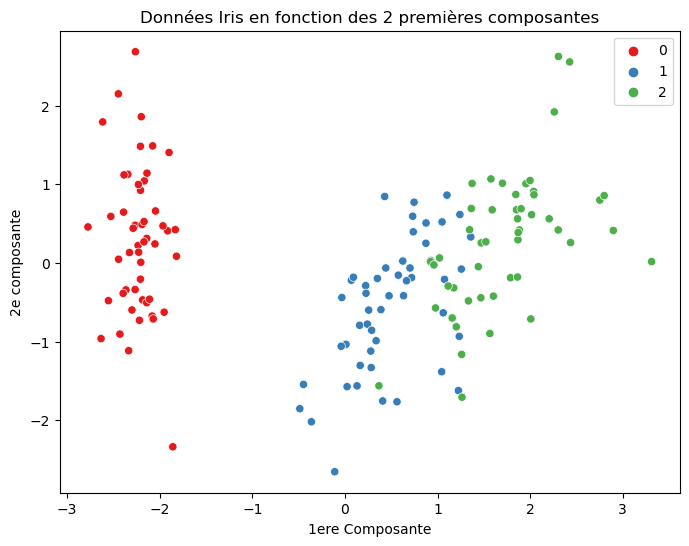

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_iris[:,0],
                y=reduced_iris[:,1],
                hue=iris.target,
                data=reduced_iris,
                palette='Set1')
plt.xlabel('1ere Composante')
plt.ylabel('2e composante')
plt.title('Données Iris en fonction des 2 premières composantes')

**Exemple avec le jeu de données `climat.csv`**

Le jeu de donnée `climat.csv` est un échantillon de données climatiques. On analysera les variables climatiques (température maximale moyenne et précipitations totales) de certaines stations météo canadiennes pour les mois de mars, juin, septembre et décembre 2010.

In [8]:
# Importation du fichier
climat=pd.read_csv('climat.csv')
climat.head()

,location,longitude,latitude,elevation_m,province,tmax_mars,tmax_juin,tmax_sept,tmax_dec,precip_mars,precip_juin,precip_sept,precip_dec
0,VICTORIA INT'L A BC 118,-123.43,48.65,19.51,BRITISH COLUMBIA,11.5,18.9,18.8,7.9,73.4,28.5,112.3,177.0
1,COMOX A BC 155,-124.90,49.72,25.60,BRITISH COLUMBIA,10.0,18.2,17.6,6.6,125.2,44.0,65.8,319.4
2,PORT HARDY A BC 202,-127.37,50.68,21.60,BRITISH COLUMBIA,9.2,14.9,15.2,6.2,189.6,62.6,281.8,288.8
3,TERRACE A BC 441,-128.58,54.47,217.30,BRITISH COLUMBIA,6.5,18.1,16.5,-1.0,156.0,58.9,160.3,95.3
4,WILLIAMS LAKE A BC 664,-122.05,52.18,939.70,BRITISH COLUMBIA,8.1,19.0,15.1,-1.7,10.2,38.7,35.2,14.4


In [9]:
# On garde nos variables d'intérêt pour l'ACP
X=climat.loc[:,'tmax_mars':'precip_dec']
X

,tmax_mars,tmax_juin,tmax_sept,tmax_dec,precip_mars,precip_juin,precip_sept,precip_dec
0,11.5,18.9,18.8,7.9,73.4,28.5,112.3,177.0
1,10.0,18.2,17.6,6.6,125.2,44.0,65.8,319.4
2,9.2,14.9,15.2,6.2,189.6,62.6,281.8,288.8
3,6.5,18.1,16.5,-1.0,156.0,58.9,160.3,95.3
4,8.1,19.0,15.1,-1.7,10.2,38.7,35.2,14.4
...,...,...,...,...,...,...,...,...
184,2.6,15.5,17.3,5.1,251.6,122.1,253.0,326.9
185,2.9,16.1,17.3,7.1,28.0,153.0,107.6,34.4
186,-1.5,13.6,13.7,2.9,30.8,161.0,54.8,116.5
187,-0.9,16.0,14.7,0.9,24.2,162.4,57.8,45.8


In [10]:
# On standardise
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
#On effectue l'ACP; 
pca = PCA()
#Chacune des observations est projetée dans les nouvelles dimensions
reduced_climat = pca.fit_transform(X_scaled)

In [12]:
#Interprétation des composantes
# Pour chacune des composantes, on a le poids de chacune des variables
poids_composante=pd.DataFrame(data=pca.components_,index=[f'CP{i+1}' for i in range(pca.n_components_)],
                              columns=X.columns)
poids_composante.T

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8
tmax_mars,-0.406981,-0.334929,-0.122998,0.289809,-0.090379,0.021559,0.757888,-0.200111
tmax_juin,-0.347636,-0.483793,-0.088713,-0.056450,-0.399524,0.115350,-0.280989,0.618189
tmax_sept,-0.455809,-0.226672,0.089104,0.121519,0.012944,-0.010385,-0.546142,-0.647770
tmax_dec,-0.393545,0.203264,-0.088241,0.404548,0.686356,-0.096154,-0.106933,0.374960
precip_mars,-0.272674,0.497943,0.302230,0.209280,-0.503888,-0.530806,0.019014,0.080868
precip_juin,-0.317344,0.024257,0.730327,-0.479599,0.207673,0.233099,0.179909,0.074033
precip_sept,-0.327265,0.127251,-0.511392,-0.678470,0.098407,-0.371130,0.063954,-0.057873
precip_dec,-0.262137,0.544372,-0.273920,0.016221,-0.232905,0.709259,-0.011265,-0.047200


En triant le tableau précédent, on remarque que les villes qui ont une valeur très faibles sur la première composante sont celles où les températures maximales sont très élevées, particulièrement en septembre et en mars. Les précipitations y seront plutôt élevées, mais cet aspect est moins important pour cette composante que la température. La première composante oppose donc les températures froides aux températures plus élevées. Sur la deuxième composante, les villes aux scores élevés sont celles dont la température est basse en juin et en mars et le climat humide en mars et en décembre.
Sur la deuxième composante, les villes aux scores élevés sont celles dont la température est basse en juin et en mars et le climat humide en mars et en décembre

Nous allons représenter les observations sur les 2 premières composantes principales.

C:\Users\Catherine\AppData\Local\Temp\ipykernel_34840\745147304.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=reduced_climat[:,0],


Text(0.5, 1.0, 'Données Climat en fonction des 2 premières composantes')

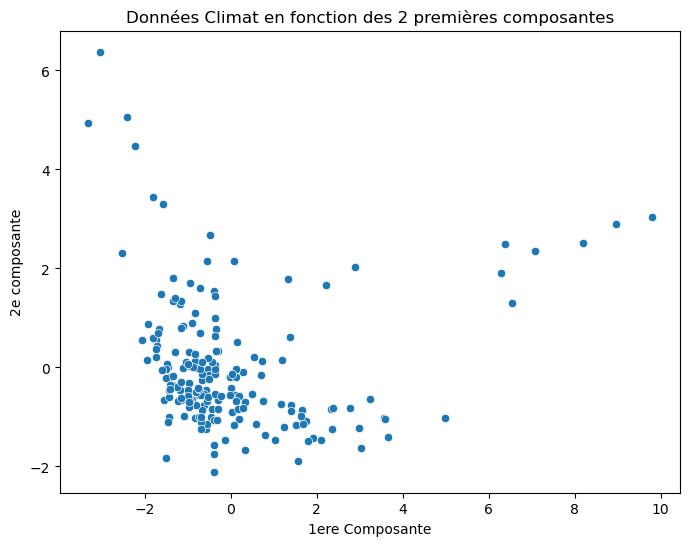

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_climat[:,0],
                y=reduced_climat[:,1],
                palette='Set1')
plt.xlabel('1ere Composante')
plt.ylabel('2e composante')
plt.title('Données Climat en fonction des 2 premières composantes')

Afin de faciliter l'interprétation nous allons regrouper les provinces en région et attribuer une couleur aux observations en fonction de leur région.

In [14]:
#Regroupement par région
climat['region'] = climat['province'].apply(lambda x: 
    "AB et SK" if x in ['ALBERTA', 'SASKATCHEWAN'] else 
    "BC" if x in ['BRITISH COLUMBIA'] else 
    "Centre" if x in ['ONTARIO', 'MANITOBA', 'QUEBEC'] else 
    "Maritimes" if x in ["NOVA SCOTIA", "PRINCE EDWARD ISLAND", "NEWFOUNDLAND", "NEW BRUNSWICK"] else 
    "Nord" if x in ["YUKON TERRITORY", "NORTHWEST TERRITORIES", "NUNAVUT"] else 
    None  
)

climat.head()


,location,longitude,latitude,elevation_m,province,tmax_mars,tmax_juin,tmax_sept,tmax_dec,precip_mars,precip_juin,precip_sept,precip_dec,region
0,VICTORIA INT'L A BC 118,-123.43,48.65,19.51,BRITISH COLUMBIA,11.5,18.9,18.8,7.9,73.4,28.5,112.3,177.0,BC
1,COMOX A BC 155,-124.90,49.72,25.60,BRITISH COLUMBIA,10.0,18.2,17.6,6.6,125.2,44.0,65.8,319.4,BC
2,PORT HARDY A BC 202,-127.37,50.68,21.60,BRITISH COLUMBIA,9.2,14.9,15.2,6.2,189.6,62.6,281.8,288.8,BC
3,TERRACE A BC 441,-128.58,54.47,217.30,BRITISH COLUMBIA,6.5,18.1,16.5,-1.0,156.0,58.9,160.3,95.3,BC
4,WILLIAMS LAKE A BC 664,-122.05,52.18,939.70,BRITISH COLUMBIA,8.1,19.0,15.1,-1.7,10.2,38.7,35.2,14.4,BC


Text(0.5, 1.0, 'Données Climat en fonction des 2 premières composantes')

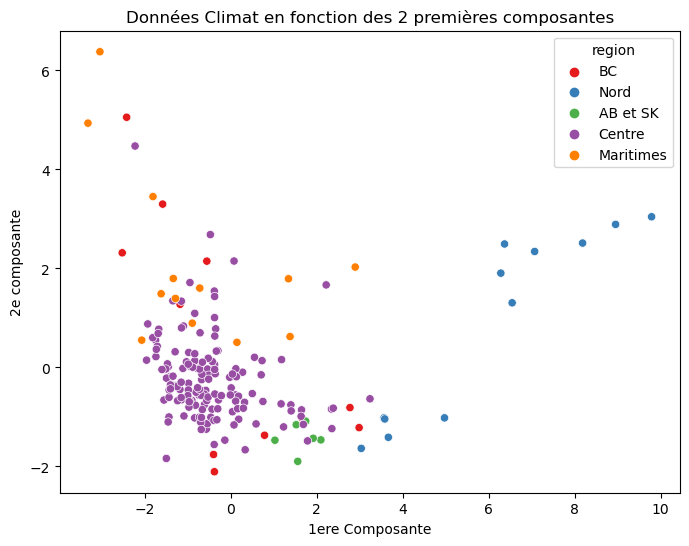

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_climat[:,0],
                y=reduced_climat[:,1],
                hue=climat['region'],
                palette='Set1')
plt.xlabel('1ere Composante')
plt.ylabel('2e composante')
plt.title('Données Climat en fonction des 2 premières composantes')

On voit que les régions très froides de septembre à mars se distinguent sur l’axe de la première composante. La seconde composante permet d’identifier les régions maritimes (dans les valeurs élevées) et les régions aux températures plus chaudes de mars à septembre (dans les valeurs faibles).

Nous allons calculer la contribution des observations aux différentes composantes

In [16]:
c_obs=np.round(reduced_climat**2/len(reduced_climat)/pca.explained_variance_*100,2)
c_df=pd.DataFrame(data=c_obs,index=climat['location'],columns=[f'CP{i+1}' for i in range(pca.n_components_)])
c_df

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8
location,,,,,,,,
VICTORIA INT'L A BC 118,0.18,0.49,0.96,6.04,0.29,0.00,0.39,0.01
COMOX A BC 155,0.33,3.26,0.32,8.28,1.04,2.28,0.61,0.12
PORT HARDY A BC 202,0.76,7.65,1.18,1.06,1.33,4.79,6.98,0.03
TERRACE A BC 441,0.04,1.38,0.02,1.71,2.21,9.61,0.75,0.02
WILLIAMS LAKE A BC 664,0.36,0.31,0.03,3.12,0.63,0.01,1.23,0.20
...,...,...,...,...,...,...,...,...
ST JOHN'S A NL 6720,1.21,12.18,0.09,0.64,5.10,5.63,0.12,0.07
STEPHENVILLE A NL 6740,0.00,0.08,0.76,0.50,8.51,0.16,0.00,0.28
CARTWRIGHT NL 6773,0.23,0.96,1.35,0.35,5.14,1.55,0.17,0.48


On remarque que la station météo de Victoria contribue pour 0.18% de la variance de la première composante

Nous allons calculer la contribution de la variable `tmax_mars` à la première composante

In [17]:
# On calcule la coordonée de la variable en calculant
# la corrélation entre le jeu de données initial et celui projeté dans les nouvelles dimensions
Y=pd.DataFrame(reduced_climat)
r_tmax_mars=X.loc[:,'tmax_mars'].corr(Y[0])
# On calcule la contribution
c_tmax_mars=r_tmax_mars**2/pca.explained_variance_[0]*100
c_tmax_mars

16.475727733874624

La variable `tmax_mars` contribue pour environ 16% de la variance de la première composante

On génère le graphique pour sélectionner le nombre de composante (loi de Cattel)

Text(0, 0.5, 'Valeur propre')

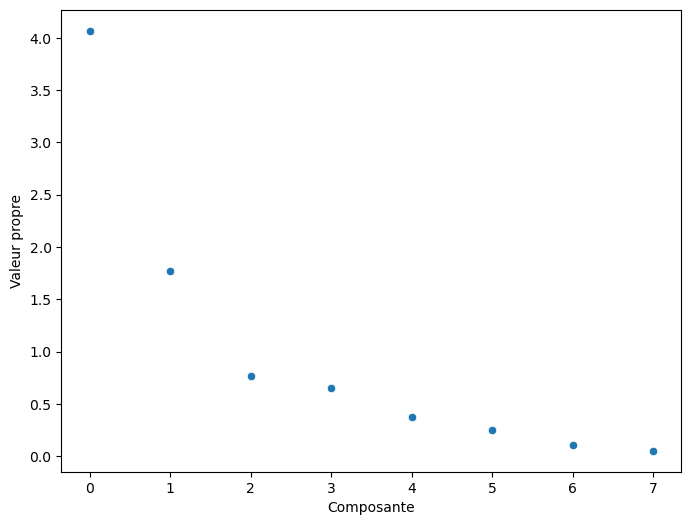

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(pca.explained_variance_)
plt.xlabel('Composante')
plt.ylabel('Valeur propre')

On conserve les 2 premières composantes

## Modèle prédictif

## Exemple avec le jeu de données Iris
On cherche à prédire l'espèce de la plante basée sur les mesures de ses feuilles et de ses pétales.

In [20]:
# On prend l'approche avec partitionnement du jeu de données

In [21]:
from sklearn.model_selection import train_test_split

# Le random_state permet de reproduire le même résultat.
# Si l'on souhaite reproduire nos résultats sur un autre ordinateur, cet argument est essentiel.  

# on sépare le jeu de données entre les variables indépendantes et la variable réponse
X = iris.data
y = iris.target

# on crée les jeux de données train et test
# pour changer la proportion (par défaut=25%), utilisez test_size=...
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
X_train_copie = X_train.copy()
X_test_copie = X_test.copy()

In [22]:
from sklearn.ensemble import RandomForestClassifier
clas_RF = RandomForestClassifier(random_state=100)
clas_RF.fit(X_train_copie, y_train)
clas_RF_preds= clas_RF.predict(X_test_copie)

In [23]:
# On mesure la performance avec la précision
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(clas_RF_preds, y_test)
print('Précision du modèle Forêt aléatoire: {0:0.4f}'.format(accuracy))

Précision du modèle Forêt aléatoire: 0.9474


## Exemple avec le jeu de données diabetes.csv
On cherche à prédire si une personne fait du diabète ou non

In [24]:
diabete=pd.read_csv('diabetes.csv')
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# Est-ce qu'on a autant de diabétique que de non diabétique dans notre jeu de données?
X = diabete.loc[:,'Pregnancies':'Age']
y = diabete['Outcome']
print('% Diabétique',sum(y==1)/len(y)*100)
print('% Non diabétique',sum(y==0)/len(y)*100)

% Diabétique 33.33333333333333
% Non diabétique 33.33333333333333


In [26]:
# Le random_state permet de reproduire le même résultat.
# Si l'on souhaite reproduire nos résultats sur un autre ordinateur, cet argument est essentiel.  

# on sépare le jeu de données entre les variables indépendantes et la variable réponse
X = diabete.loc[:,'Pregnancies':'Age']
y = diabete['Outcome']

# on crée les jeux de données train et test
# pour changer la proportion (par défaut=25%), utilisez test_size=...
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
X_train_copie = X_train.copy()
X_test_copie = X_test.copy()

In [27]:
clas_RF = RandomForestClassifier(random_state=100)
clas_RF.fit(X_train_copie, y_train)
y_pred_proba=clas_RF.predict_proba(X_test_copie)[:,1]


In [28]:
# on mesure la performance avec la courbe ROC et l'aire sous la courbe
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.7604482132041187

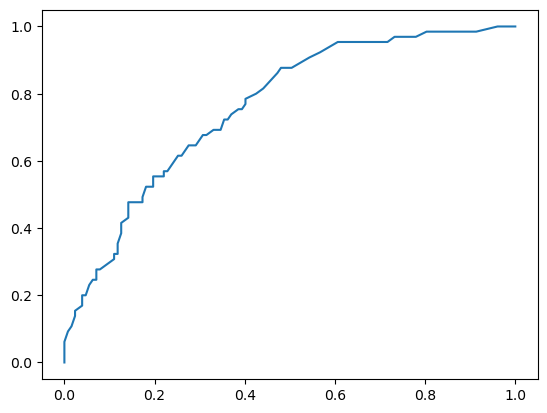

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

In [30]:
# on mesure la performance avec le score F1
y_pred=clas_RF.predict(X_test_copie)
from sklearn.metrics import f1_score
f1_score(y_test,  y_pred)

0.5573770491803279

## Exemple de validation croisée avec le jeu de données diabetes.csv
On cherche à prédire si une personne fait du diabète ou non avec validation croisée.
Afin de voir tous les critères de performance supporté avec la fonction `cross_val_score`: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [31]:
# on sépare le jeu de données entre les variables indépendantes et la variable réponse
X = diabete.loc[:,'Pregnancies':'Age']
y = diabete['Outcome']

In [32]:
clas_RF = RandomForestClassifier(random_state=100)
from sklearn.model_selection import cross_val_score

# on choisi la précision
scores = cross_val_score(clas_RF, X, y,
                         scoring="f1", cv=10)
scores.mean()

0.632723916164877

## Recherche par quadrillage avec le jeu de données diabetes.csv
La documentation de GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
La documentation pour le scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [33]:
# Le random_state permet de reproduire le même résultat.
# Si l'on souhaite reproduire nos résultats sur un autre ordinateur, cet argument est essentiel.  

# on sépare le jeu de données entre les variables indépendantes et la variable réponse
X = diabete.loc[:,'Pregnancies':'Age']
y = diabete['Outcome']

# on crée les jeux de données train et test
# pour changer la proportion (par défaut=25%), utilisez test_size=...
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
X_train_copie = X_train.copy()
X_test_copie = X_test.copy()

In [34]:
from sklearn.model_selection import GridSearchCV

#param_grid = [
#    {'n_estimators': [50,100,120,200,250],
#     'criterion':['gini', 'entropy', 'log_loss']}] 

param_grid = [{'n_estimators':[50,100,120,200,250],
              'max_depth': [3, 5, 7, 9]}]
              #'max_samples': [0.3, 0.5, 0.8]}]

clas_RF = RandomForestClassifier(random_state=100)

RF_grid_search = GridSearchCV(clas_RF, param_grid, cv=10,
                           scoring='f1',
                           return_train_score=True)

RF_grid_search.fit(X_train_copie, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': [3, 5, 7, 9],
                          'n_estimators': [50, 100, 120, 200, 250]}],
             return_train_score=True, scoring='f1')

In [35]:
RF_grid_search.best_params_


{'max_depth': 9, 'n_estimators': 50}

In [36]:
## Prédictions sur le test set
reg_RF_gridsearch_preds= RF_grid_search.best_estimator_.predict(X_test_copie)
f1_score(y_test,  reg_RF_gridsearch_preds)

0.5203252032520326

## Importance des variables avec le jeu de données diabetes.csv
Pour mieux comprendre son modèle, on peut extraire l'importance des variables. Il s'agit aussi d'une manière de rendre le modèle plus transparent et de valider sa cohérence. Voici l'exemple pour l'importance des variables pour les forêts aléatoires. Ici, on calcule l'importance d'un arbre en comparant comment l'embranchement augmente la performance (pondéré par le nombre d'observation du noeud). La mesure de performance ici est la pureté (Gini). Il y a aussi d'autres manières de calculer l'importance des variables pour un modèle à base d'arbres :

* Nombre de fois qu'une variable est utilisée pour construire l'arbre. Plus une variable est utilisée, plus elle est considérée comme étant importante (NON-RECOMMANDÉE, pas assez précis comme méthode),
* Importance des variables par permutation

Text(0.5, 1.0, 'Feature Importance')

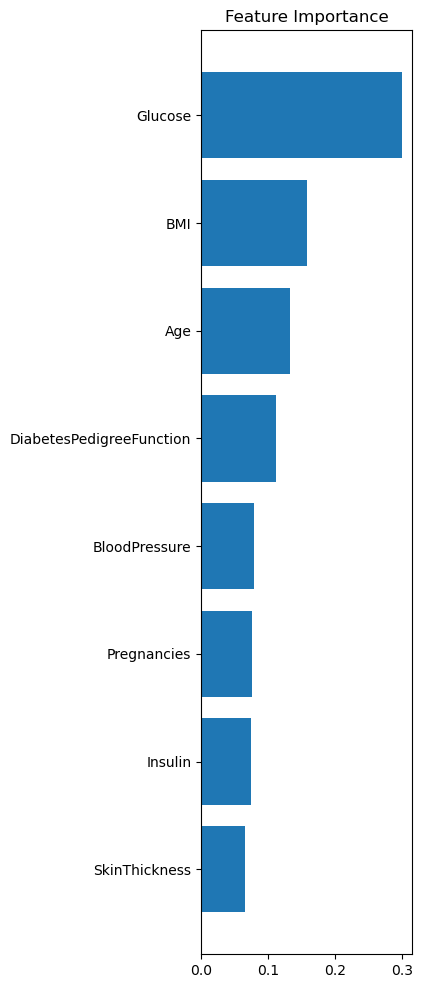

In [37]:
feature_importance = RF_grid_search.best_estimator_.feature_importances_
feature_importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(6, 12))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_copie.columns)[sorted_idx])
plt.title("Feature Importance")
